In [1]:
from PIL import Image

import matplotlib.pyplot as plt
import cv2
import numpy as np

import sys
sys.path.append('..')
from utils import vis2arr, ir2arr

from pylab import rcParams
rcParams['figure.figsize'] = (10, 10)

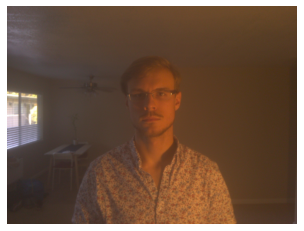

In [42]:
vis_img = Image.open("../images/test_images/1594774387vis.jpg")
vis_img = vis_img.resize((816,616))
vis_arr = vis2arr(vis_img)
plt.axis('off')
plt.imshow(vis_arr, cmap='plasma')

In [43]:
import torch
import torchvision.transforms as T
from aithermometer.visible.detr import DETRdemo, detect, overlay_bboxes

detr = DETRdemo(num_classes=91)
state_dict = torch.hub.load_state_dict_from_url(
    url='https://dl.fbaipublicfiles.com/detr/detr_demo-da2a99e9.pth',
    map_location='cuda', check_hash=True)

detr.load_state_dict(state_dict)
detr.eval()
detr = detr.to('cuda')

transform = T.Compose([
#     T.Resize((400,300)),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [44]:
scores, boxes = detect(vis_img, detr, transform)

In [45]:
vis_img_ovrl = overlay_bboxes(vis_img, scores, boxes)

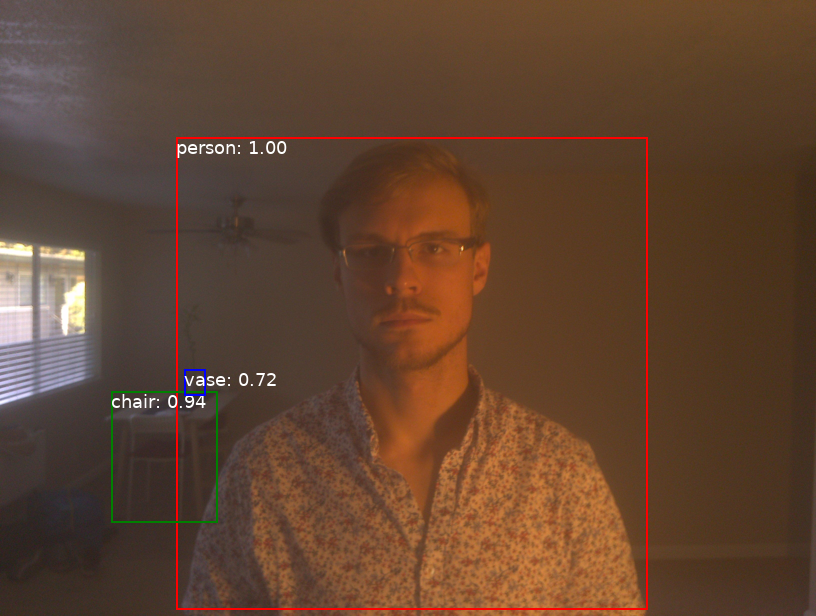

In [46]:
vis_img_ovrl